In [1]:
import os
os.chdir('/mnt/jw01-aruk-home01/projects/ra_challenge/RA_challenge/RA2_alpine_lads/ra_joint_predictions')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
import os
import tensorflow as tf
import tensorflow_addons as tfa
from utils.config import Config

import PIL
import PIL.ImageOps
from tensorflow.keras.utils import plot_model
configuration = Config()
from tensorflow.keras.models import load_model

import itertools
import seaborn as sns

AUTOTUNE = tf.data.experimental.AUTOTUNE

from dataset.ops import dataset_ops
import dataset.ops.image_ops as ops
from dataset import landmarks_faces_pretrain_dataset as land_pre
from model import landmarks_model
from dataset.landmarks_dataset import feet_landmarks_dataset,hands_landmarks_dataset

from dataset import joint_dataset, rsna_joint_dataset

In [3]:
# reload the library
import importlib
import types
import os

def reload_package(package):
    assert(hasattr(package, "__package__"))
    fn = package.__file__
    fn_dir = os.path.dirname(fn) + os.sep
    module_visit = {fn}
    del fn

    def reload_recursive_ex(module):
        importlib.reload(module)

        for module_child in vars(module).values():
            if isinstance(module_child, types.ModuleType):
                fn_child = getattr(module_child, "__file__", None)
                if (fn_child is not None) and fn_child.startswith(fn_dir):
                    if fn_child not in module_visit:
                        # print("reloading:", fn_child, "from", module)
                        module_visit.add(fn_child)
                        reload_recursive_ex(module_child)

    return reload_recursive_ex(package)
reload_package(joint_dataset)
reload_package(rsna_joint_dataset)

In [4]:
rsna_object = rsna_joint_dataset.rsna_wrist_dataset(configuration)


In [5]:
wrist_dataset = rsna_object.create_rsna_wrist_dataset()

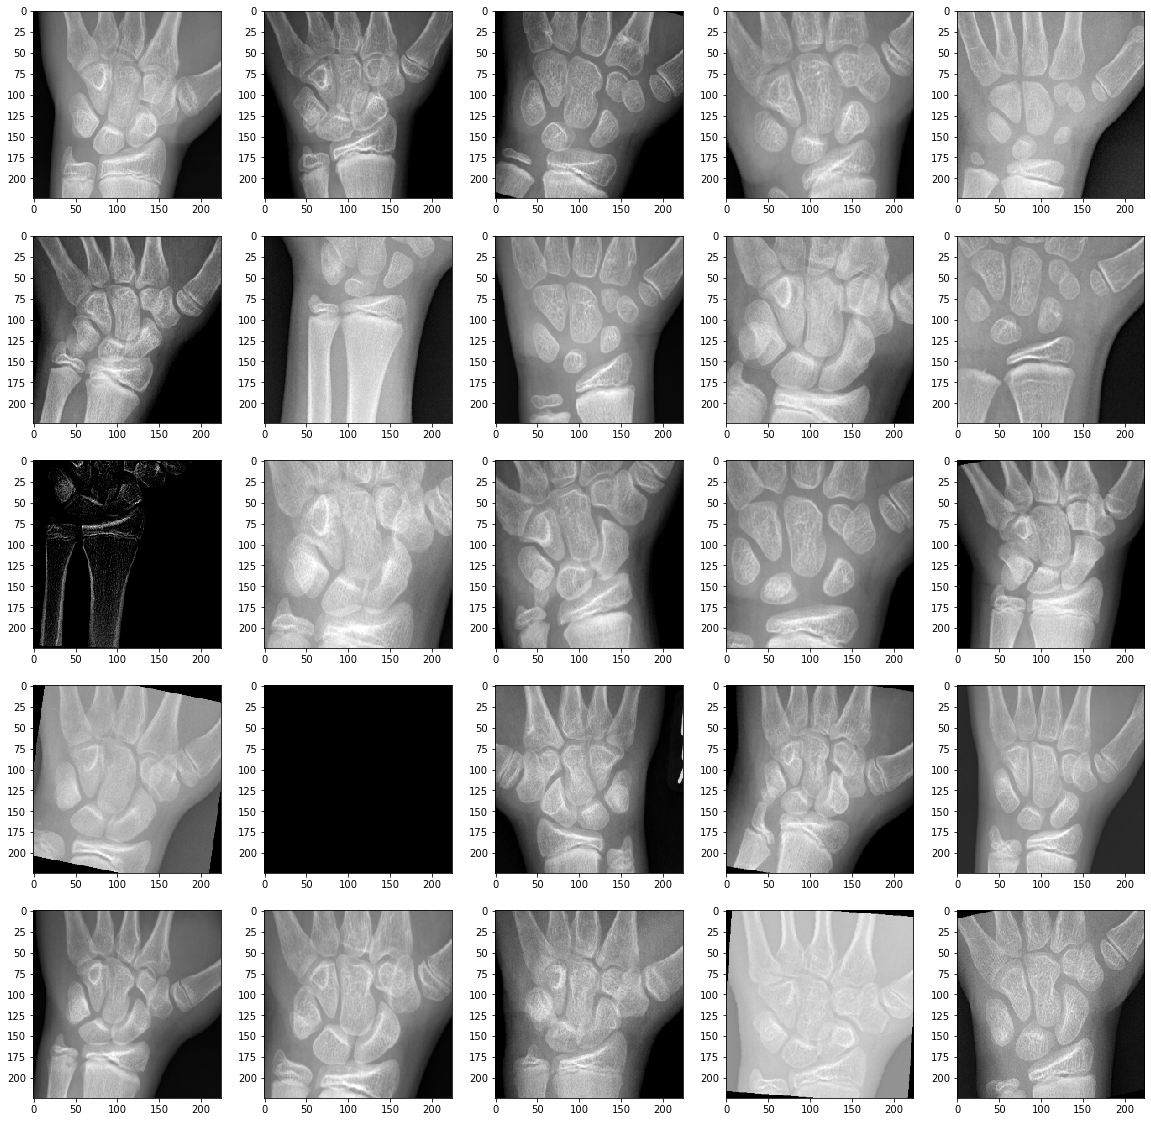

In [6]:
for a,b in wrist_dataset.take(1):
    plt.figure(figsize=(20,20))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(np.array(a[n])[:, :,0],cmap="gray")

In [7]:
b

<tf.Tensor: id=669, shape=(64, 3), dtype=float64, numpy=
array([[180.,   1.,   1.],
       [132.,   0.,   1.],
       [126.,   1.,   1.],
       [120.,   0.,   1.],
       [108.,   1.,   1.],
       [120.,   0.,   1.],
       [144.,   1.,   1.],
       [108.,   1.,   1.],
       [192.,   1.,   1.],
       [108.,   1.,   1.],
       [168.,   0.,   1.],
       [138.,   0.,   1.],
       [132.,   0.,   1.],
       [120.,   1.,   1.],
       [162.,   0.,   1.],
       [168.,   1.,   1.],
       [156.,   0.,   1.],
       [162.,   1.,   1.],
       [120.,   0.,   1.],
       [162.,   1.,   1.],
       [162.,   1.,   1.],
       [153.,   1.,   1.],
       [168.,   1.,   1.],
       [168.,   1.,   1.],
       [132.,   1.,   1.],
       [150.,   0.,   1.],
       [156.,   1.,   1.],
       [168.,   1.,   1.],
       [198.,   1.,   1.],
       [192.,   1.,   1.],
       [180.,   0.,   1.],
       [210.,   0.,   1.],
       [132.,   1.,   1.],
       [162.,   1.,   1.],
       [150.,   1.,   1.]

In [70]:
dream_obj  = joint_dataset.feet_joint_dataset(configuration)
feet_data = dream_obj.create_feet_joints_dataset("/mnt/iusers01/jw01/mdefscs4/ra_challenge/RA_challenge/training_dataset/training.csv")

2020-02-27 15:27:21,456;WARNING - Missing permissions to create directory for caching!


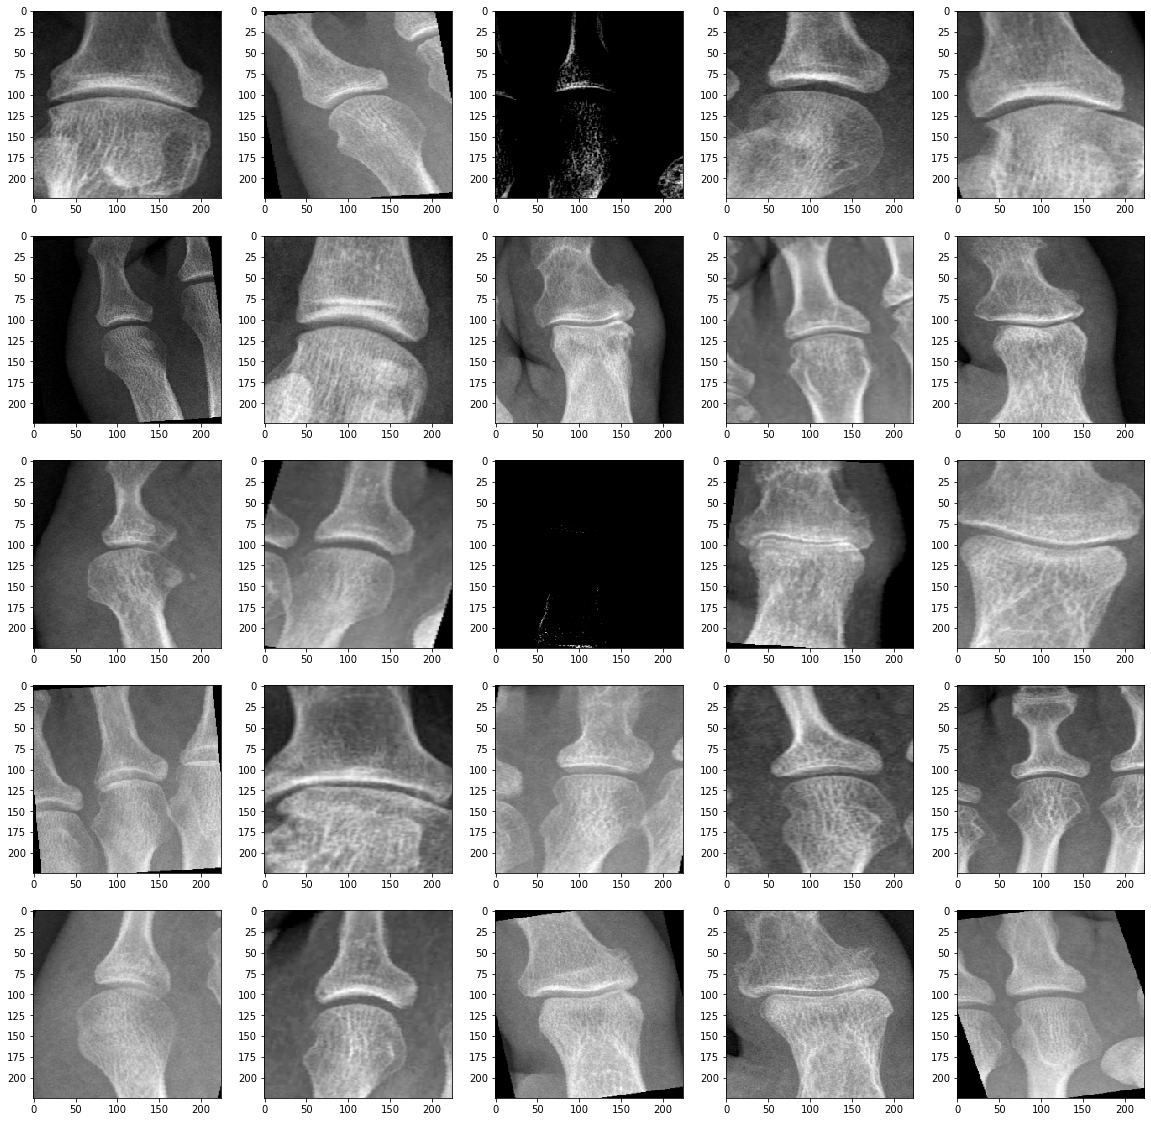

In [71]:
for a,b in feet_data.take(1):
    plt.figure(figsize=(20,20))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(np.array(a[n])[:, :,0],cmap="gray")

In [150]:
dream_obj  = joint_dataset.hands_wrists_dataset(configuration)
hands_data = dream_obj.create_wrists_joints_dataset("/mnt/iusers01/jw01/mdefscs4/ra_challenge/RA_challenge/training_dataset/training.csv",)

2020-02-27 16:14:41,596;WARNING - Missing permissions to create directory for caching!


In [ ]:
for a,b in hands_data.take(1):
    plt.figure(figsize=(20,20))
    for n in range(25):
        ax = plt.subplot(5,5,n+1)
        plt.imshow(np.array(a[n])[:, :,0],cmap="gray")

In [84]:
pd.DataFrame([[2,3,4],[3,4,5]]).values.max()

5

In [149]:
reload_package(joint_dataset)

In [101]:
from sklearn.preprocessing import OneHotEncoder

In [146]:
enc = OneHotEncoder(sparse = False, dtype = np.int32)
enc.fit(np.array([[1,2,3,4,5,6]]).T)

/mnt/jw01-aruk-home01/projects/ra_challenge/tensorflow2.0_gpu/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.int32'>, handle_unknown='error',
              n_values=None, sparse=False)

In [148]:
ar = np.array([[1,2,4,6]])

In [147]:
enc.transform(ar)

ValueError: X has different shape than during fitting. Expected 1, got 4.

In [128]:
np.array([[1,2,3,4,5,6]]).T.shape

(6, 1)